In [2]:
from tensorflow.keras.datasets import mnist


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


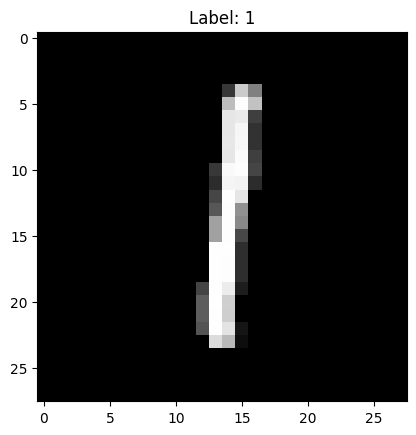

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5500], cmap='gray')
plt.title(f"Label: {y_train[5500]}")
plt.show()


In [6]:
import numpy as np

# Extract the image and label
image = X_train[3]
label = y_train[3]

# Print all 28x28 pixel values neatly
np.set_printoptions(threshold=np.inf, linewidth=120)
print(image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127 251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  68 236 251 21

In [7]:
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [9]:
print("After scaling:", X_train[0, 10:20])


After scaling: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

model = SVC(kernel='rbf')  # you can try 'linear', 'poly', etc.
model.fit(X_train, y_train)



SVC()

In [11]:
y_pred = model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


SVM Accuracy: 0.9792
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [12]:
import joblib
joblib.dump(model, "handwritten_digit_model.pkl")

['handwritten_digit_model.pkl']

In [13]:
import joblib
# Load your trained model
handwritten_digit_model = joblib.load("handwritten_digit_model.pkl")


In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# import json
# # Calculate metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# # Print results
# print("SVM Accuracy:", accuracy)
# print(classification_report(y_test, y_pred))

# # Store metrics in dictionary
# metrics = {
#     "accuracy": accuracy,
#     "precision": precision,
#     "recall": recall,
#     "f1_score": f1
# }

# # Save to JSON file
# with open("metrics.json", "w") as f:
#     json.dump(metrics, f, indent=4)

# print("Metrics saved to 'metrics.json'")


SVM Accuracy: 0.9792
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Metrics saved to 'metrics.json'


Predicted Digit: 5


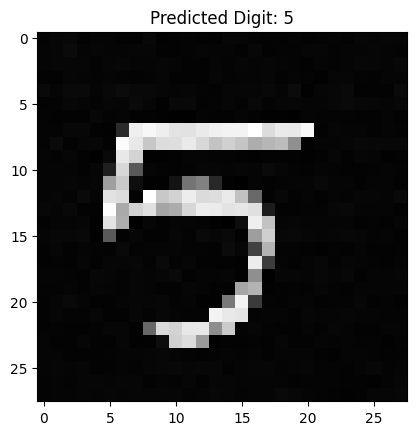

In [35]:
# === Test the model on a new unseen handwritten image ===
import cv2
import numpy as np
from PIL import Image

# Path to your unseen image
image_path = "Screenshot_886.png"  # Change this to your image filename

# Step 1: Read the image (grayscale)
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Resize to 28x28 (same as MNIST)
img_resized = cv2.resize(img, (28, 28))

# Step 3: Invert colors if background is white and digit is black
# MNIST digits are white (high pixel values) on black background
img_inverted = cv2.bitwise_not(img_resized)

# Step 4: Flatten and scale (same preprocessing as training)
img_flattened = img_resized.reshape(1, -1)
img_scaled = img_flattened / 255.0

# Step 5: Predict using the trained model
prediction = handwritten_digit_model.predict(img_scaled)

# Step 6: Display result
print(f"Predicted Digit: {prediction[0]}")

# Optional: visualize the preprocessed image
plt.imshow(img_inverted, cmap='gray')
plt.title(f"Predicted Digit: {prediction[0]}")
plt.show()
